In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')

label_counts = df['Traffic Subtype'].value_counts()
valid_labels = label_counts[label_counts > 5000].index  # κραταω τα labelsμε τουλαχιστον 5000 samples
df_filtered = df[df['Traffic Subtype'].isin(valid_labels)]
df_sampled = df_filtered.sample(frac=0.005, random_state=42)  # κανω υποδειγματοληψια κρατοντας το 0.5% απο τα συχνα labels (>> 10.000)
df_dropped = df[~df['Traffic Subtype'].isin(valid_labels)]  # κραταει αυτα που εχουν κατω απο 10.000 δειγματα δλδ τα σπανια
df = pd.concat([df_sampled, df_dropped], ignore_index=True)

In [5]:
pd.set_option("display.max_columns", None)
# Set the display option to show all rows
pd.set_option('display.max_rows', None)
display(df.head(5))
display(df.tail(5))

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.70-192.168.1.90-36575-0-6,192.168.1.70,36575.0,192.168.1.90,0,6.0,03/01/1970 03:59:07 AM,1556508.0,2.0,0.0,100.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,64.246377,1.284928,1556508.0,0.0,1556508.0,1556508.0,1556508.0,1556508.0,0.0,1556508.0,1556508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,1.284928,0.000000,50.0,50.0,50.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,512.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS RST
1,192.168.1.70-192.168.1.90-52420-0-6,192.168.1.70,52420.0,192.168.1.90,0,6.0,01/01/1970 10:50:10 PM,204683.0,1.0,1.0,480.0,0.0,480.0,480.0,480.0,0.0,0.0,0.0,0.0,0.0,2345.089724,9.771207,204683.0,0.0,204683.0,204683.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,20.0,4.885604,4.885604,0.0,480.0,320.000000,277.128129,76800.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,480.0,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS ACK
2,192.168.1.70-192.168.1.90-41705-0-6,192.168.1.70,41705.0,192.168.1.90,0,6.0,01/01/1970 04:52:41 AM,10320.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,4844.961240,193.798450,10320.0,0.0,10320.0,10320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,20.0,96.899225,96.899225,0.0,50.0,33.333333,28.867513,833.333333,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS URG
3,192.168.1.70-192.168.1.90-3040-0-6,192.168.1.70,3040.0,192.168.1.90,0,6.0,01/01/1970 04:59:49 AM,26153.0,1.0,1.0,500.0,0.0,500.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,19118.265591,76.473062,26153.0,0.0,26153.0,26153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,20.0,38.236531,38.236531,0.0,500.0,333.333333,288.675135,83333.333333,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS PSH
4,192.168.1.70-192.168.1.90-27915-0-6,192.168.1.70,27915.0,192.168.1.90,0,6.0,01/01/1970 10:40:39 PM,78301.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,638.561449,25.542458,78301.0,0.0,78301.0,78301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,12.771229,12.771229,0.0,50.0,33.333333,28.867513,833.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS ACK


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
61462,192.168.1.70-192.168.1.90-37479-1234-17,192.168.1.70,37479.0,192.168.1.90,1234,17.0,02/01/1970 04:44:54 AM,22485411.0,2307.0,0.0,3036012.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,135021.414552,102.599859,9.750829e+03,2.943433e+03,34364.0,30.0,22485411.0,9.750829e+03,2.943433e+03,34364.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18456.0,0.0,102.599859,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1316.570438,1316.0,0.0,0.0,0.0,0.0,3036012.0,2307.0,135021.0,0.0,0.0,0.0,0.0,0.0,0.0,2306.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
61463,136.162.16.0-255.255.255.1-0-0-0,136.162.16.0,0.0,255.255.255.1,0,0.0,02/01/1970 04:45:08 AM,65027682.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138403,8.128460e+06,1.382986e+07,38099180.0,403.0,65027682.0,8.128460e+06,1.382986e+07,38099180.0,403.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3586913.0,0.0,3586913.0,3586913.0,28925934.5,1.297293e+07,38099180.0,19752689.0,Benign,Video,Video UDP
61464,192.168.1.70-192.168.1.90-57042-1234-17,192.168.1.70,57042.0,192.168.1.90,1234,17.0,02/01/1970 04:45:18 AM,49795393.0,5256.0,0.0,6916896.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,138906.344207,105.551933,9.475812e+03,4.683333e+04,482563.0,0.0,49795393.0,9.475812e+03,4.683333e+04,482563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42048.0,0.0,105.551933,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1316.250381,1316.0,0.0,0.0,0.0,0.0,6916896.0,5256.0,138906.0,0.0,0.0,0.0,0.0,0.0,0.0,5255.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
61465,192.168.1.70-192.168.1.90-57890-1234-17,192.168.1.70,57890.0,192.168.1.90,1234,17.0,02/01/1970 04:46:10 AM,8809176.0,596.0,0.0,784336.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,89036.250383,67.656725,1.480534e+04,6.279618e+04,773425.0,0.0,8809176.0,1.480534e+04,6.279618e+04,773425.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4768.0,0.0,67.656725,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1318.208054,1316.0,0.0,0.0,0.0,0.0,784336.0,596.0,89036.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
61466,192.168.1.70-192.168.1.90-53417-1234-17,192.168.1.70,53417.0,192.168.1.90,1234,17.0,02/01/1970 04:46:19 AM,2856556.0,477.0,0.0,627732.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,219751.336925,166.984299,6.001168e+03,3.897524e+03,25978.0,17.0,2856556.0,6.001168e+03,3.897524e+03,25978.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61467 entries, 0 to 61466
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     61467 non-null  object 
 1   Src IP                      61467 non-null  object 
 2   Src Port                    61467 non-null  float64
 3   Dst IP                      61467 non-null  object 
 4   Dst Port                    61467 non-null  int64  
 5   Protocol                    61467 non-null  float64
 6   Timestamp                   61467 non-null  object 
 7   Flow Duration               61467 non-null  float64
 8   Total Fwd Packet            61467 non-null  float64
 9   Total Bwd packets           61467 non-null  float64
 10  Total Length of Fwd Packet  61467 non-null  float64
 11  Total Length of Bwd Packet  61467 non-null  float64
 12  Fwd Packet Length Max       61467 non-null  float64
 13  Fwd Packet Length Min       614

In [7]:
df["Label"].value_counts()

Label
Malicious    60166
Benign        1301
Name: count, dtype: int64

In [8]:
counts = df.groupby(['Label', 'Traffic Type']).size().reset_index(name='Counts')
print(counts)

       Label           Traffic Type  Counts
0     Benign                  Audio     190
1     Benign             Background      32
2     Benign                   Text     209
3     Benign                  Video     870
4  Malicious             Bruteforce   13100
5  Malicious                    DoS   37523
6  Malicious  Information Gathering    5167
7  Malicious                  Mirai    4376


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

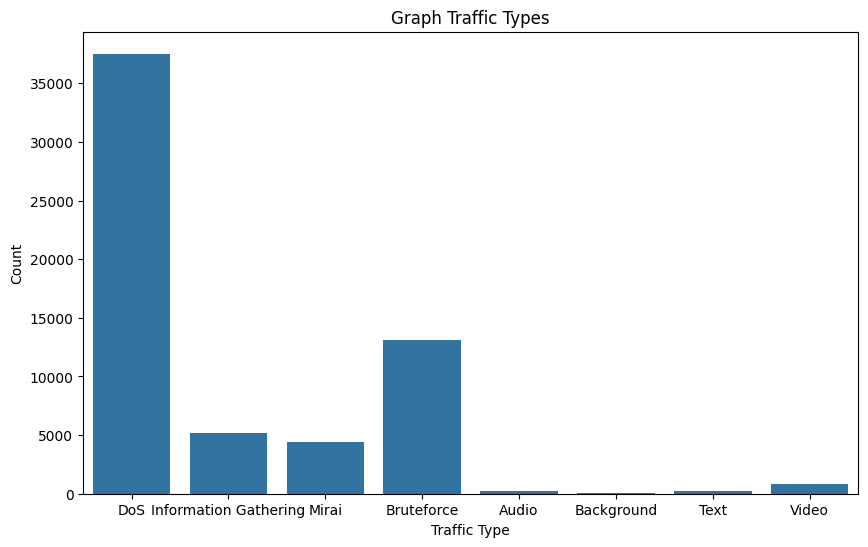

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Traffic Type', data=df)
plt.title('Graph Traffic Types')
plt.xlabel('Traffic Type')
plt.ylabel('Count')

plt.show()

In [11]:
counts2 = df.groupby(['Label', 'Traffic Subtype']).size().reset_index(name='Counts2')
print(counts2)

        Label        Traffic Subtype  Counts2
0      Benign                  Audio      190
1      Benign             Background       32
2      Benign                   Text      209
3      Benign             Video HTTP      376
4      Benign              Video RTP      349
5      Benign              Video UDP      145
6   Malicious         Bruteforce DNS      107
7   Malicious         Bruteforce FTP     3485
8   Malicious        Bruteforce HTTP      628
9   Malicious         Bruteforce SSH     3967
10  Malicious      Bruteforce Telnet     4913
11  Malicious                DoS ACK     4777
12  Malicious                DoS CWR     4448
13  Malicious                DoS ECN     4393
14  Malicious                DoS FIN     3540
15  Malicious               DoS HTTP      395
16  Malicious               DoS ICMP        9
17  Malicious                DoS MAC       30
18  Malicious                DoS PSH     4584
19  Malicious                DoS RST     5360
20  Malicious                DoS S

In [12]:
packet1 = df[['Fwd Packet Length Max','Fwd Packet Length Min','Bwd Packet Length Max','Bwd Packet Length Min','Packet Length Mean','Packet Length Std',]]

In [13]:
pd.pivot_table(df , index = 'Label', values = packet1)

,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std
Label,,,,,,
Benign,309.688701,1.490392,361.805534,247.723290,330.873169,90.677626
Malicious,50.844264,0.273460,265.392730,223.011701,189.996167,94.141990


In [14]:
packet2 = df[['Protocol','Src Port','Dst Port', 'Flow Duration','Flow Bytes/s', 'Flow Packets/s','Flow IAT Max','Flow IAT Min']]

In [15]:
pd.pivot_table(df , index = 'Label', values = packet2)

,Dst Port,Flow Bytes/s,Flow Duration,Flow IAT Max,Flow IAT Min,Flow Packets/s,Protocol,Src Port
Label,,,,,,,,
Benign,19679.650269,53262.415859,4.637073e+07,8.437284e+06,1.379410e+06,3630.976692,9.359723,41374.259800
Malicious,5627.853821,6945.924199,8.587801e+06,5.886181e+06,2.343170e+06,315.795572,6.333361,30076.150434


In [16]:
packet3 = df[['SYN Flag Count','ACK Flag Count','RST Flag Count','PSH Flag Count','FIN Flag Count']]

In [17]:
pd.pivot_table(df , index = 'Label', values = packet3)

,ACK Flag Count,FIN Flag Count,PSH Flag Count,RST Flag Count,SYN Flag Count
Label,,,,,
Benign,1054.578017,0.262875,471.506533,0.213682,0.453497
Malicious,20.829173,0.393894,7.558671,0.820131,0.444936


In [18]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,61467.000000,61467.000000,61467.000000,6.146700e+04,61467.000000,61467.000000,6.146700e+04,6.146700e+04,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,61467.000000,61467.0,61467.000000,61467.0,61467.000000,61467.000000,6.146700e+04,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.000000,61467.0,61467.0,61467.0,6.146700e+04,61467.000000,6.146700e+04,61467.000000,6.146700e+04,61467.000000,6.146700e+04,61467.000000,61467.000000,61467.000000,61467.000000,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04,6.146700e+04
mean,30315.284283,5925.271739,6.397416,9.387508e+06,57.770544,35.487985,2.537316e+04,1.946084e+04,267.433387,223.534742,231.671996,12.310477,56.322921,0.299217,14.511648,12.156711,7.926251e+03,3.859641e+02,3.653741e+06,1.826828e+06,5.940177e+06,2.322771e+06,8.820766e+06,4.147330e+06,1.064572e+06,5.633331e+06,3.432257e+06,2.351878e+06,1.703153e+05,3.514766e+05,8.831675e+05,9.599023e+03,0.098085,0.0,0.082337,0.0,912.249435,751.985488,3.237811e+02,62.183003,80.163047,289.490084,192.977945,94.068664,35168.360253,0.391120,0.445117,0.807295,17.378512,42.709324,0.144142,0.134446,0.130021,0.556982,265.778655,231.671996,14.511648,0.0,0.0,0.0,4.196888e+04,34.955976,1.024716e+06,11.355069,7.021859e+02,9.023118,4.609784e+03,11508.388794,132.045114,24.282688,23.249158,2.964447e+05,4.644311e+04,3.452662e+05,2.596396e+05,4.953248e+06,4.388691e+05,5.329177e+06,4.624874e+06
std,20333.043547,15164.437904,2.142136,1.463173e+07,2227.395944,1201.116410,5.154997e+05,3.326218e+05,368.541699,346.890345,345.690161,50.562503,231.150827,12.464764,110.950980,49.418120,6.194060e+04,9.597480e+03,6.353088e+06,3.986909e+06,8.639426e+06,5.844452e+06,1.445024e+07,7.103195e+06,2.831814e+06,8.482770e+06,6.813153e+06,8.621256e+06,6.208290e+05,1.103994e+06,2.684328e+06,3.396304e+05,0.297432,0.0,0.274879,0.0,8660.142382,9211.729035,9.406633e+03,1103.469821,248.852457,391.194884,293.086133,162.234013,102331.743771,0.670364,1.249733,0.619014,221.545352,505.791350,0.588876,0.584690,0.568207,5.989195,405.307450,345.690161,110.950980,0.0,0.0,0.0,5.999040e+05,458.341657,7.262974e+07,739.468239,4.931990e+04,419.271894,1.881118e+05,23255.676746,1268.942611,402.827199,7.141598,1.986526e+06,8.905140e+05,2.528050e+06,1.782885e+06,8.164920e

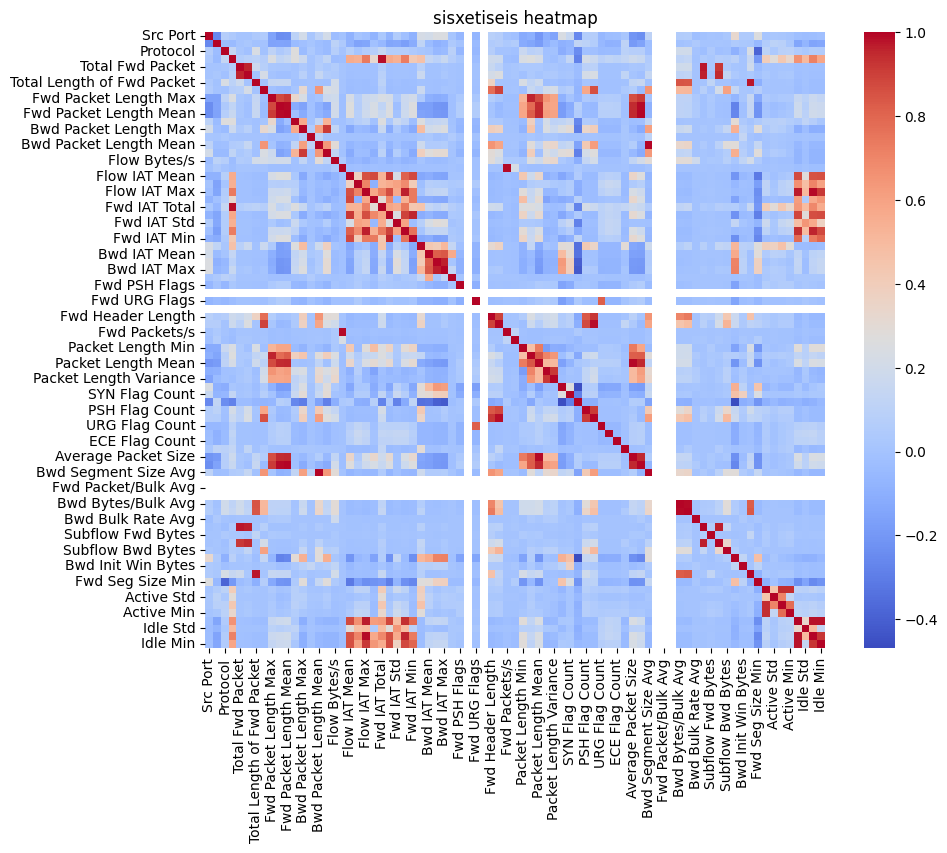

In [19]:
df_heat = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(df_heat, cmap='coolwarm', annot=False)
plt.title('sisxetiseis heatmap')
plt.show()

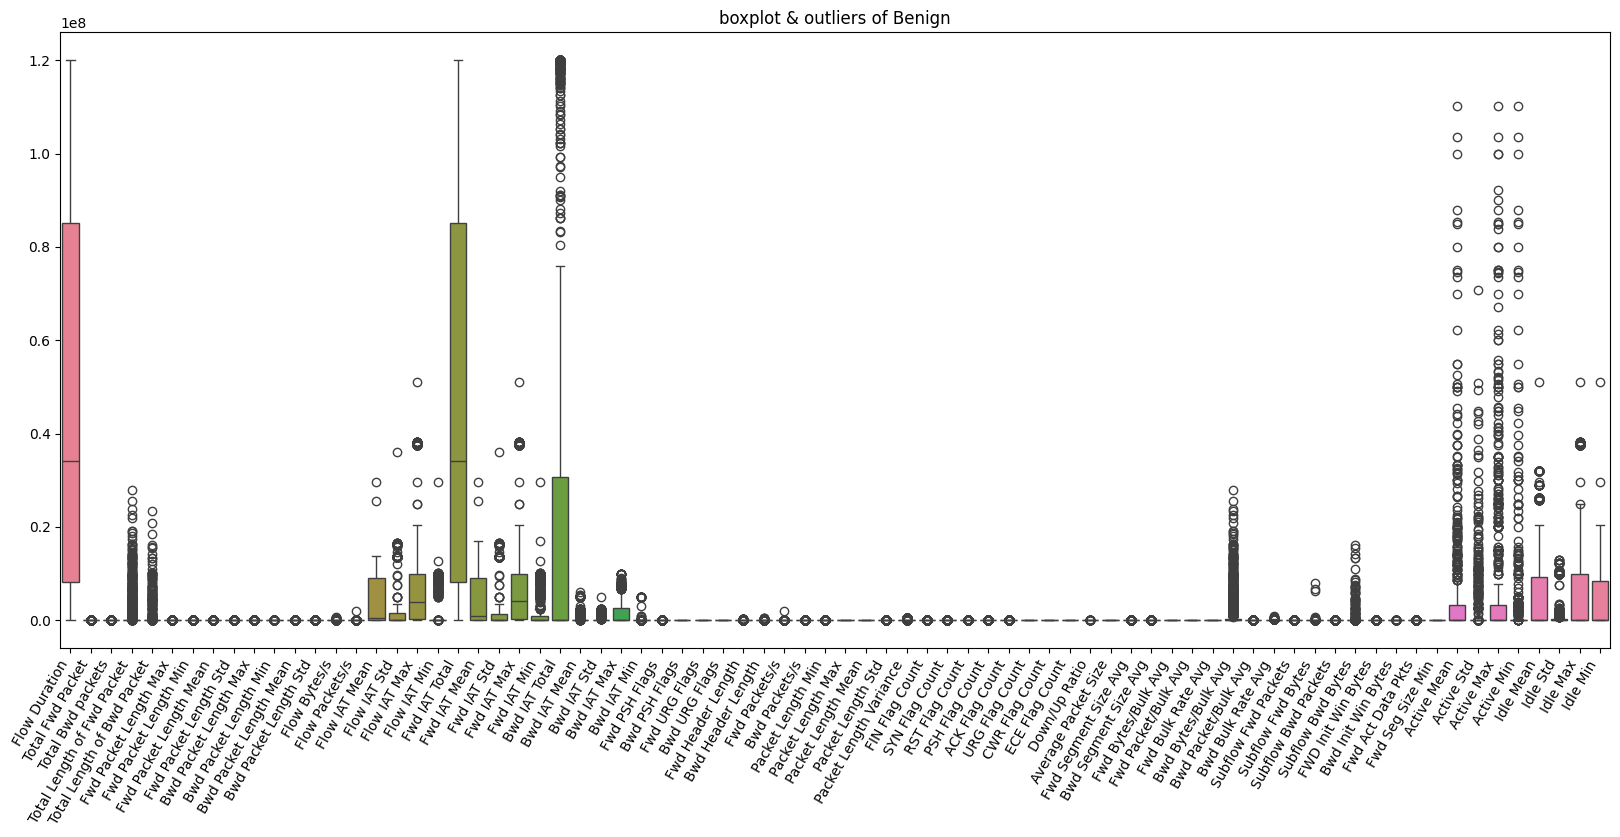

In [20]:
benign_df = df[df['Label'] == 'Benign']
#σβηνω τις στηλες που δεν περιεχουν αριθμητικες τιμες καθως δεν ειναι χρησιμες στην ευρεση outliers
benign_df = benign_df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol',
                                    'Timestamp', 'Label', 'Traffic Type', 'Traffic Subtype'])

plt.figure(figsize=(20, 8))
sns.boxplot(data=benign_df)
plt.xticks(rotation=60, ha='right', fontsize=10)  
plt.title('boxplot & outliers of Benign')
plt.show()

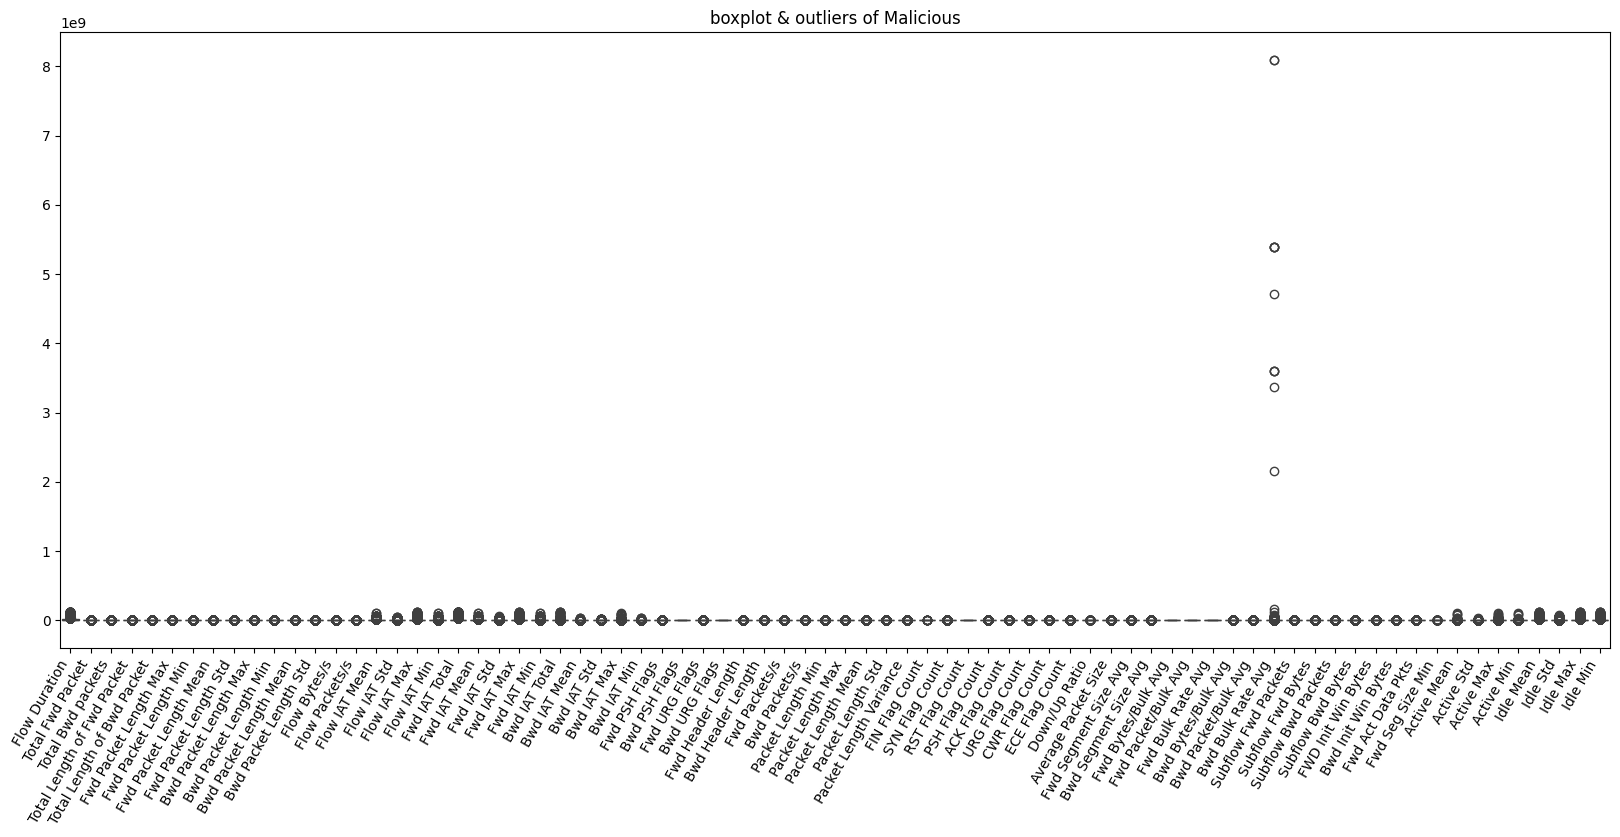

In [21]:
Malicious_df = df[df['Label'] == 'Malicious']
#σβηνω τις στηλες που δεν περιεχουν αριθμητικες τιμες καθως δεν ειναι χρησιμες στην ευρεση outliers
Malicious_df = Malicious_df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol',
                                    'Timestamp', 'Label', 'Traffic Type', 'Traffic Subtype'])

plt.figure(figsize=(20, 8))
sns.boxplot(data=Malicious_df)
plt.xticks(rotation=60, ha='right', fontsize=10)  
plt.title('boxplot & outliers of Malicious')
plt.show()

In [22]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'Malicious' else 0)

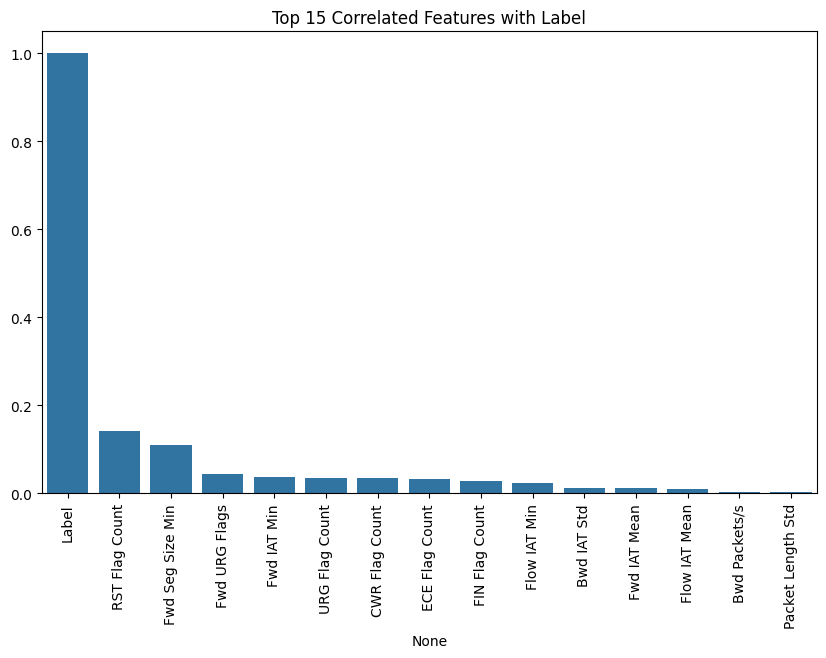

Label                    1.000000
RST Flag Count           0.141017
Fwd Seg Size Min         0.108875
Fwd URG Flags            0.044047
Fwd IAT Min              0.037150
URG Flag Count           0.035994
CWR Flag Count           0.033813
ECE Flag Count           0.033649
FIN Flag Count           0.028132
Flow IAT Min             0.023736
Bwd IAT Std              0.012708
Fwd IAT Mean             0.012629
Flow IAT Mean            0.010924
Bwd Packets/s            0.003598
Packet Length Std        0.003074
Bwd Bulk Rate Avg        0.001953
SYN Flag Count          -0.000986
Fwd PSH Flags           -0.002809
Fwd Packet Length Std   -0.005803
Idle Min                -0.007724
Name: Label, dtype: float64


In [23]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['Label'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index[:15], y=correlation.values[:15])
plt.xticks(rotation=90)
plt.title("Top 15 Correlated Features with Label")
plt.show()

# Εκτύπωση των top 10 πιο σχετικών στηλών
print(correlation.head(20))

In [24]:
features = ['Label','RST Flag Count','Fwd Seg Size Min','Fwd URG Flags','URG Flag Count',
           'ECE Flag Count','CWR Flag Count','Bwd Init Win Bytes','Fwd IAT Min',
           'FIN Flag Count','SYN Flag Count','ACK Flag Count','PSH Flag Count',
            'Bwd Packet Length Max','Bwd Packet Length Min','Fwd Packet Length Max',
            'Fwd Packet Length Min','Packet Length Mean','Packet Length Std','Traffic Type',
           'Traffic Subtype']
df_new = df[features]

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61467 entries, 0 to 61466
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Label                  61467 non-null  int64  
 1   RST Flag Count         61467 non-null  float64
 2   Fwd Seg Size Min       61467 non-null  float64
 3   Fwd URG Flags          61467 non-null  float64
 4   URG Flag Count         61467 non-null  float64
 5   ECE Flag Count         61467 non-null  float64
 6   CWR Flag Count         61467 non-null  float64
 7   Bwd Init Win Bytes     61467 non-null  float64
 8   Fwd IAT Min            61467 non-null  float64
 9   FIN Flag Count         61467 non-null  float64
 10  SYN Flag Count         61467 non-null  float64
 11  ACK Flag Count         61467 non-null  float64
 12  PSH Flag Count         61467 non-null  float64
 13  Bwd Packet Length Max  61467 non-null  float64
 14  Bwd Packet Length Min  61467 non-null  float64
 15  Fw

In [26]:
df_new.head()

,Label,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype
0,1,2.0,20.0,0.0,0.0,0.0,0.0,0.0,1556508.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.000000,0.000000,DoS,DoS RST
1,1,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,480.0,480.0,320.000000,277.128129,DoS,DoS ACK
2,1,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,DoS,DoS URG
3,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,500.0,500.0,333.333333,288.675135,DoS,DoS PSH
4,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,DoS,DoS ACK


In [27]:
df_new["Label"].value_counts()

Label
1    60166
0     1301
Name: count, dtype: int64

In [28]:
#metatropi stilis type se numerical apo object
df_new["Label"] = df_new["Label"].astype(str).str[-2:]

unique_list_3 = sorted(df_new["Label"].unique())
mapping_3 = {item: idx for idx, item in enumerate(unique_list_3)}

df_new["Label"] = df_new["Label"].map(mapping_3)
print(mapping_3)

{'0': 0, '1': 1}


C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\1964582485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Label"] = df_new["Label"].astype(str).str[-2:]
C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\1964582485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Label"] = df_new["Label"].map(mapping_3)


In [29]:
#metatropi stilis type se numerical apo object
df_new["Traffic Type"] = df_new["Traffic Type"].astype(str).str[-2:]

unique_list = sorted(df_new["Traffic Type"].unique())
mapping = {item: idx for idx, item in enumerate(unique_list)}

df_new["Traffic Type"] = df_new["Traffic Type"].map(mapping)
print(mapping)

{'ai': 0, 'ce': 1, 'eo': 2, 'io': 3, 'nd': 4, 'ng': 5, 'oS': 6, 'xt': 7}


C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\4226910204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Type"] = df_new["Traffic Type"].astype(str).str[-2:]
C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\4226910204.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Type"] = df_new["Traffic Type"].map(mapping)


In [30]:
#metatropi stilis subtype apo object se numerical
df_new["Traffic Subtype"] = df_new["Traffic Subtype"].astype(str).str[-3:]

unique_list_2 = sorted(df_new["Traffic Subtype"].unique())
mapping_2 = {item: idx for idx, item in enumerate(unique_list_2)}

df_new["Traffic Subtype"] = df_new["Traffic Subtype"].map(mapping_2)
print(mapping_2)

{'ACK': 0, 'CMP': 1, 'CWR': 2, 'DNS': 3, 'ECN': 4, 'EIP': 5, 'ETH': 6, 'FIN': 7, 'FTP': 8, 'MAC': 9, 'PSH': 10, 'RST': 11, 'RTP': 12, 'SSH': 13, 'SYN': 14, 'TTP': 15, 'UDP': 16, 'URG': 17, 'dio': 18, 'ext': 19, 'ing': 20, 'net': 21, 'rce': 22, 'und': 23}


C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\3398298600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Subtype"] = df_new["Traffic Subtype"].astype(str).str[-3:]
C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\3398298600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Subtype"] = df_new["Traffic Subtype"].map(mapping_2)


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61467 entries, 0 to 61466
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Label                  61467 non-null  int64  
 1   RST Flag Count         61467 non-null  float64
 2   Fwd Seg Size Min       61467 non-null  float64
 3   Fwd URG Flags          61467 non-null  float64
 4   URG Flag Count         61467 non-null  float64
 5   ECE Flag Count         61467 non-null  float64
 6   CWR Flag Count         61467 non-null  float64
 7   Bwd Init Win Bytes     61467 non-null  float64
 8   Fwd IAT Min            61467 non-null  float64
 9   FIN Flag Count         61467 non-null  float64
 10  SYN Flag Count         61467 non-null  float64
 11  ACK Flag Count         61467 non-null  float64
 12  PSH Flag Count         61467 non-null  float64
 13  Bwd Packet Length Max  61467 non-null  float64
 14  Bwd Packet Length Min  61467 non-null  float64
 15  Fw

In [32]:
df_new = df_new.drop(columns=['cluster'])

KeyError: "['cluster'] not found in axis"

In [33]:
#epilegw to 35% twn data gia na ftiaksw ena kainourgio df me deigmatolipsia
df_sampled = df_new.sample(frac=0.35, random_state=42)

In [34]:
df_sampled.head()

,Label,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype
56956,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,0,0
25598,1,2.0,20.0,0.0,0.0,0.0,0.0,0.0,2627735.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.000000,0.000000,6,11
12514,1,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,6,15
26904,1,2.0,20.0,0.0,0.0,0.0,0.0,0.0,5881988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5,20
21039,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5,20


In [35]:
print(df_sampled["Label"].value_counts())

Label
1    21058
0      455
Name: count, dtype: int64


C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\467427418.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster'] = model.predict(data) #ginetai provlepsi se poio cluster anikei kathe simio kai dimiourgeitai mia stili cluster me ta ids


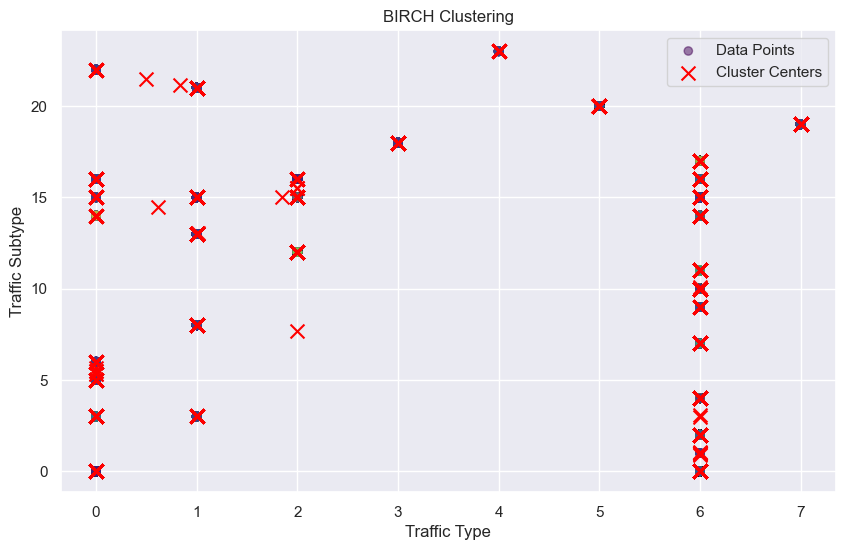

In [36]:
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

feature_cols = [col for col in df_new.columns if col != 'Label']
data = df_new[feature_cols] #pairnei ola ta columns pou den einai label to opoio thelw na min epireasei(unsupervised)

model = Birch(branching_factor=50, n_clusters=None, threshold=1.5) #bf = posoi komvoi se kathe epipedo tou dentrou birch
model.fit(data) #to katofli 1.5 kathorizei poso konta prepei na einai ta stoixeia gia na theorithoun sto idio cluster

df_new['cluster'] = model.predict(data) #ginetai provlepsi se poio cluster anikei kathe simio kai dimiourgeitai mia stili cluster me ta ids

df_birch = df_new.groupby('cluster').agg({**{col: 'mean' for col in feature_cols}, 'Label': lambda x: x.mode()[0]}).reset_index()
#omadopoioudai ta data ana cluster upologizetai sto kathe ena o m.o mean kai gia tin stili label kratame tin pio suxni timi

#epilegw dio columns gia to scatter plot
feature_x = feature_cols[18] 
feature_y = feature_cols[19] 

plt.figure(figsize=(10, 6))
plt.scatter(df_new[feature_x], df_new[feature_y], c=df_new['cluster'], cmap='viridis', alpha=0.5, label="Data Points")
plt.scatter(df_birch[feature_x], df_birch[feature_y], c='red', marker='x', s=100, label="Cluster Centers")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.title("BIRCH Clustering")
plt.show()

In [37]:
print(df_birch["Label"].value_counts())

Label
1    28337
0      947
Name: count, dtype: int64


In [38]:
df_birch.head()

,cluster,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype,Label
0,0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1103086.0,0.0,5.0,1.0,0.0,0.0,0.0,50.0,30.0,40.0,19.148542,6.0,14.0,1
1,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1188768.0,0.0,2.0,1.0,0.0,0.0,0.0,50.0,50.0,37.5,25.000000,6.0,14.0,1
2,2,2.0,20.0,0.0,0.0,0.0,0.0,0.0,1183952.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.000000,6.0,11.0,1
3,3,1.0,40.0,0.0,0.0,0.0,0.0,0.0,1135892.0,0.0,0.0,2.0,0.0,0.0,0.0,30.0,30.0,22.5,15.000000,6.0,0.0,1
4,4,0.0,20.0,0.0,0.0,2.0,0.0,0.0,1139550.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.000000,6.0,4.0,1


In [39]:
from sklearn.cluster import DBSCAN

# ekpedefsi dbscan
dbscan = DBSCAN(eps=1.5, min_samples=10).fit(df_new.drop(columns=['Label'])) #an se mia aktina eps=1.5 uparxoyn toulax 10 samples to simio 
#theoritai pukno kai dimiourgitai ena cluster-etiketa gia afto. allios theoritai thorivos kai agnoeitai.

# prosthiki olwn twn clusters sto df
df_new['Cluster'] = dbscan.labels_

# diatirisi twn data apo pio puknes perioxes
df_dbscan = df_new[df_new['Cluster'] != -1]  # afairoume ta outliers (-1) opoia den exoun etiketa cluster dld kai theoroude araia simia i thorivos
df_dbscan = df_dbscan.drop(columns=['Cluster']) #diagrafi tis stilis cluster afou den xreiazetai

C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\1354481039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cluster'] = dbscan.labels_


In [40]:
print(df_dbscan["Label"].value_counts())

Label
1    29179
0      267
Name: count, dtype: int64


In [41]:
df_dbscan.head()

,Label,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype,cluster
1,1,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,480.0,480.0,320.000000,277.128129,6,0,2569
2,1,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,6,17,4965
3,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,500.0,500.0,333.333333,288.675135,6,10,2570
4,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,6,0,4966
5,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,6,14,4967


In [42]:
df_dbscan.describe()

,Label,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype,cluster
count,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.0,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000,29446.000000
mean,0.990933,0.794845,24.838688,0.101372,0.101372,0.082150,0.081675,101.791754,6.030632,0.392209,0.453984,8.522618,4.154520,43.711370,0.0,213.657475,182.108809,128.014209,108.510682,3.890240,9.621680,4423.869286
std,0.094792,0.408504,7.275142,0.301826,0.301826,0.274598,0.273873,202.583102,15.976596,0.643828,0.775695,20.470893,11.507362,188.860265,0.0,332.992824,312.474669,219.864957,170.653521,2.542031,7.583789,1113.565121
min,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2569.000000
25%,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,15.000000,0.000000,9.928571,17.320508,1.000000,2.000000,2621.000000
50%,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,50.000000,50.000000,33.333333,28.867513,6.000000,8.000000,4970.000000
75%,1.000000,1.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,500.000000,480.000000,320.000000,181.478824,6.000000,17.000000,5024.000000
max,1.000000,2.000000,44.000000,1.000000,1.000000,1.000000,1.000000,510.000000,604.000000,2.000000,3.000000,84.000000,46.000000,1056.000000,0.0,1356.000000,1356.000000,1328.000000,782.886965,6.000000,21.000000,5773.000000


In [43]:
df_new = df_new.drop(columns=['Cluster'])

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61467 entries, 0 to 61466
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Label                  61467 non-null  int64  
 1   RST Flag Count         61467 non-null  float64
 2   Fwd Seg Size Min       61467 non-null  float64
 3   Fwd URG Flags          61467 non-null  float64
 4   URG Flag Count         61467 non-null  float64
 5   ECE Flag Count         61467 non-null  float64
 6   CWR Flag Count         61467 non-null  float64
 7   Bwd Init Win Bytes     61467 non-null  float64
 8   Fwd IAT Min            61467 non-null  float64
 9   FIN Flag Count         61467 non-null  float64
 10  SYN Flag Count         61467 non-null  float64
 11  ACK Flag Count         61467 non-null  float64
 12  PSH Flag Count         61467 non-null  float64
 13  Bwd Packet Length Max  61467 non-null  float64
 14  Bwd Packet Length Min  61467 non-null  float64
 15  Fw

In [45]:
y = df_dbscan['Label']
y.head()

1    1
2    1
3    1
4    1
5    1
Name: Label, dtype: int64

In [46]:
k = df_birch['Label']
k.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [47]:
x = df_dbscan.drop(columns=['Label'])
x.head()

,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype,cluster
1,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,480.0,480.0,320.000000,277.128129,6,0,2569
2,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,6,17,4965
3,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,500.0,500.0,333.333333,288.675135,6,10,2570
4,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,6,0,4966
5,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,50.0,50.0,33.333333,28.867513,6,14,4967


In [48]:
l = df_birch.drop(columns=['Label'])
l.head()

,cluster,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype
0,0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1103086.0,0.0,5.0,1.0,0.0,0.0,0.0,50.0,30.0,40.0,19.148542,6.0,14.0
1,1,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1188768.0,0.0,2.0,1.0,0.0,0.0,0.0,50.0,50.0,37.5,25.000000,6.0,14.0
2,2,2.0,20.0,0.0,0.0,0.0,0.0,0.0,1183952.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.000000,6.0,11.0
3,3,1.0,40.0,0.0,0.0,0.0,0.0,0.0,1135892.0,0.0,0.0,2.0,0.0,0.0,0.0,30.0,30.0,22.5,15.000000,6.0,0.0
4,4,0.0,20.0,0.0,0.0,2.0,0.0,0.0,1139550.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.000000,6.0,4.0


Accuracy Birch: 1.00
0.9951214752658796

Classification Report:
              precision    recall  f1-score   support

           0      0.984     0.871     0.924       278
           1      0.996     1.000     0.998      8508

    accuracy                          0.995      8786
   macro avg      0.990     0.935     0.961      8786
weighted avg      0.995     0.995     0.995      8786



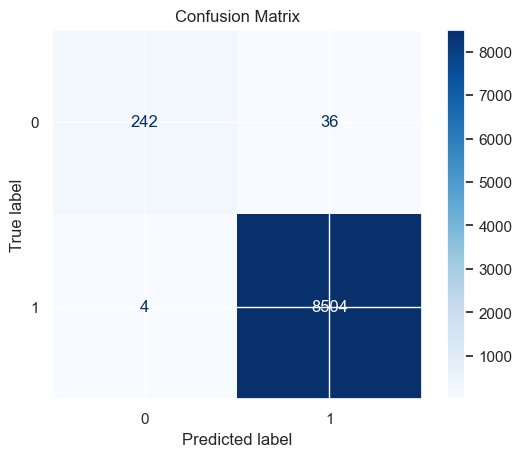

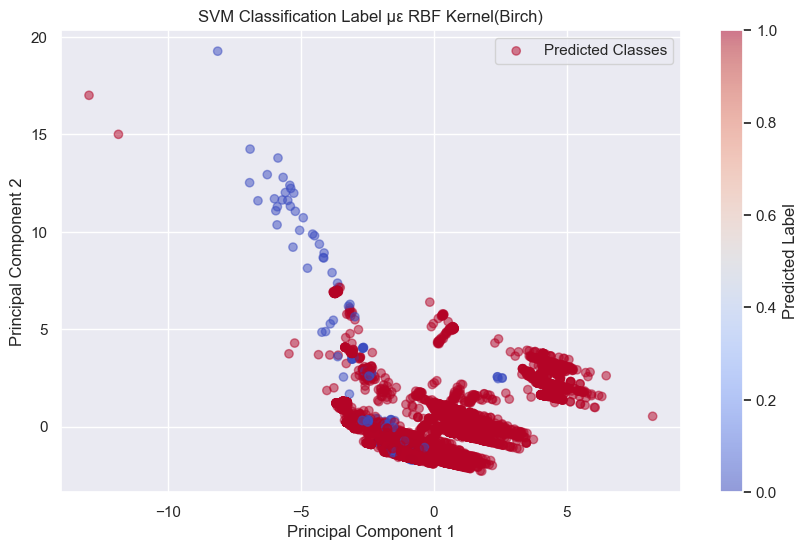

In [49]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

# Κανονικοποίηση δεδομένων
scaler = StandardScaler()
l_scaled = scaler.fit_transform(l)

# Διαχωρισμός train-test
l_train, l_test, k_train, k_test = train_test_split(l_scaled, k, test_size=0.3, random_state=42)

# Δημιουργία και εκπαίδευση SVM με RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')  
svm_rbf.fit(l_train, k_train)

# Πρόβλεψη των labels στο test set
k_pred = svm_rbf.predict(l_test)

# Υπολογισμός ακρίβειας
accuracy = accuracy_score(k_test, k_pred)
print(f"Accuracy Birch: {accuracy:.2f}")

print(f"{svm_rbf.score(l_train,k_train)}")

# Extra μετρικές
print("\nClassification Report:")
print(classification_report(k_test, k_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(k_test, k_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# PCA για μείωση σε 2 διαστάσεις
pca = PCA(n_components=2)
l_test_pca = pca.fit_transform(l_test)

# Οπτικοποίηση των προβλέψεων
plt.figure(figsize=(10, 6))
plt.scatter(l_test_pca[:, 0], l_test_pca[:, 1], c=k_pred, cmap='coolwarm', alpha=0.5, label="Predicted Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Classification Label με RBF Kernel(Birch)")
plt.colorbar(label="Predicted Label")
plt.legend()
plt.show()


Accuracy: 1.00
Training Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.718     0.836        85
           1      0.997     1.000     0.999      8749

    accuracy                          0.997      8834
   macro avg      0.999     0.859     0.917      8834
weighted avg      0.997     0.997     0.997      8834



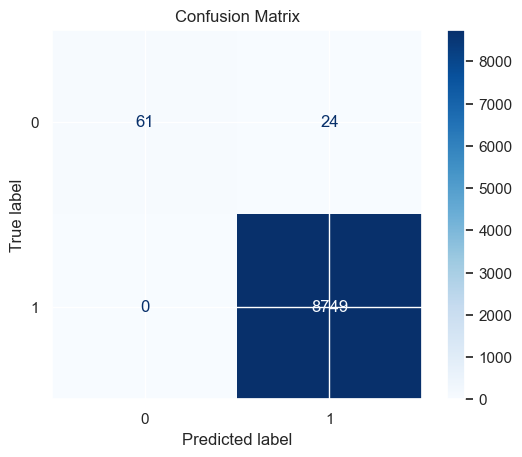

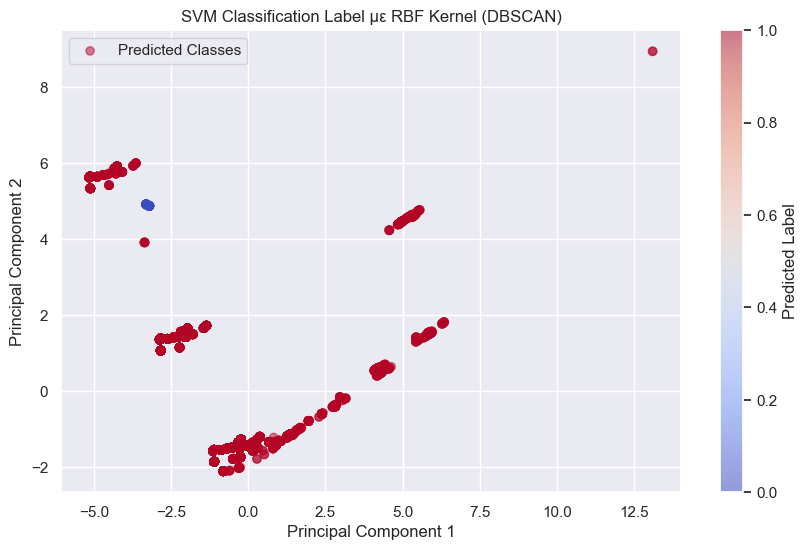

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Κανονικοποίηση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Διαχωρισμός train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Δημιουργία και εκπαίδευση SVM με RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')  
svm_rbf.fit(X_train, y_train)

# Πρόβλεψη των labels στο test set
y_pred = svm_rbf.predict(X_test)

# Υπολογισμός ακρίβειας
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Accuracy στο training set
print(f"Training Accuracy: {svm_rbf.score(X_train, y_train):.2f}")

# Extra μετρικές
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# PCA για μείωση σε 2 διαστάσεις
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Οπτικοποίηση των προβλέψεων
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.5, label="Predicted Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Classification Label με RBF Kernel (DBSCAN)")
plt.colorbar(label="Predicted Label")
plt.legend()
plt.show()


In [51]:
m = df_sampled['Label']
n = df_sampled.drop(columns=['Label'])

Accuracy: 0.99
0.9943555348960754

Classification Report:
              precision    recall  f1-score   support

           0      0.920     0.715     0.805       144
           1      0.994     0.999     0.996      6310

    accuracy                          0.992      6454
   macro avg      0.957     0.857     0.900      6454
weighted avg      0.992     0.992     0.992      6454



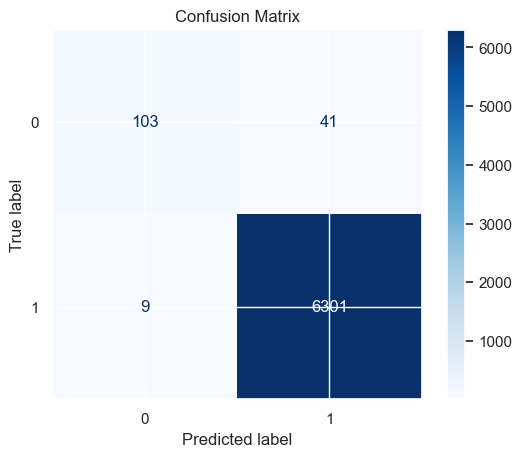

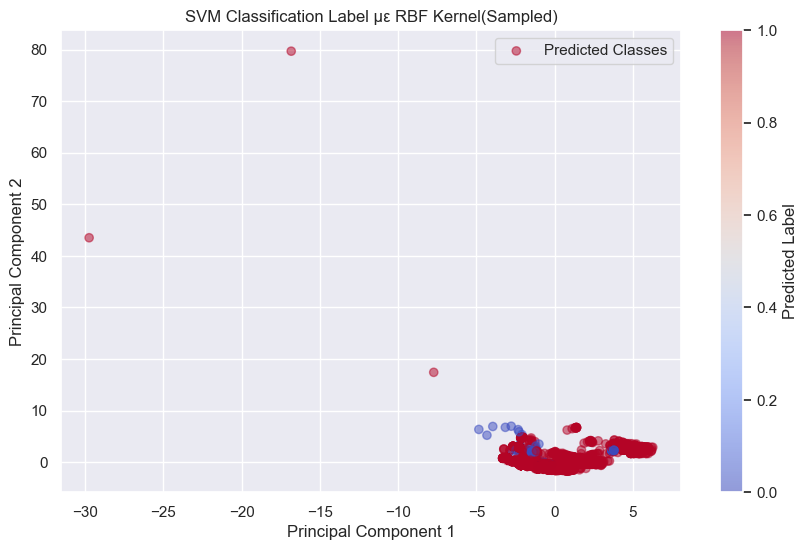

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Κανονικοποίηση δεδομένων
scaler = StandardScaler()
n_scaled = scaler.fit_transform(n)

# Διαχωρισμός train-test
n_train, n_test, m_train, m_test = train_test_split(n_scaled, m, test_size=0.3, random_state=42)

# Δημιουργία και εκπαίδευση SVM με RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')  
svm_rbf.fit(n_train, m_train)

# Πρόβλεψη των labels στο test set
m_pred = svm_rbf.predict(n_test)

# Υπολογισμός ακρίβειας
accuracy = accuracy_score(m_test, m_pred)
print(f"Accuracy: {accuracy:.2f}")

print(f"{svm_rbf.score(n_train,m_train)}")

# Extra μετρικές
print("\nClassification Report:")
print(classification_report(m_test, m_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(m_test, m_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# PCA για μείωση σε 2 διαστάσεις
pca = PCA(n_components=2)
n_test_pca = pca.fit_transform(n_test)

# Οπτικοποίηση των προβλέψεων
plt.figure(figsize=(10, 6))
plt.scatter(n_test_pca[:, 0], n_test_pca[:, 1], c=m_pred, cmap='coolwarm', alpha=0.5, label="Predicted Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Classification Label με RBF Kernel(Sampled)")
plt.colorbar(label="Predicted Label")
plt.legend()
plt.show()


In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_nn(model, X_test, y_test, dataset_name=""):
    y_pred_prob = model.predict(X_test)
    y_pred = y_pred_prob.argmax(axis=1)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔎 Accuracy ({dataset_name}): {accuracy:.2f}")
    
    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    print("\n🧾 Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # F1-score Barplot
    f1_scores = {k: v['f1-score'] for k, v in report.items() if k in ['0', '1']}
    f1_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-score'])
    f1_df.index = ['Benign', 'Malicious']
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=f1_df.index, y=f1_df['F1-score'], palette="coolwarm")
    plt.ylim(0, 1)
    plt.title(f"F1-score per Class - {dataset_name}")
    plt.ylabel("F1-score")
    plt.show()


c:\Users\aggel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9731 - loss: 0.0854 - val_accuracy: 0.9976 - val_loss: 0.0053
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9972 - loss: 0.0070 - val_accuracy: 0.9976 - val_loss: 0.0029
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9986 - loss: 0.0032 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9987 - loss: 0.0028 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 5.8195e-04
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.8840e-04
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 5.6194e-04 - val_accuracy: 1.0000 - val_loss: 1.2014e-04
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.7785e-0

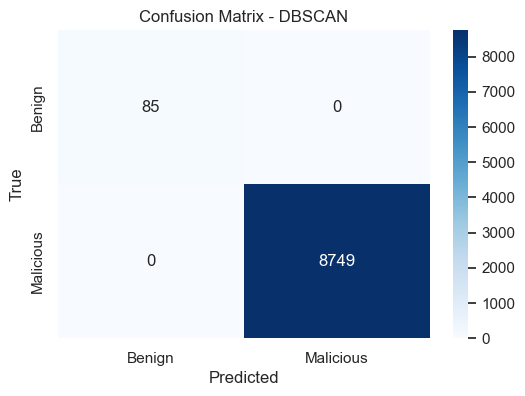

C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\4124499083.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_df.index, y=f1_df['F1-score'], palette="coolwarm")


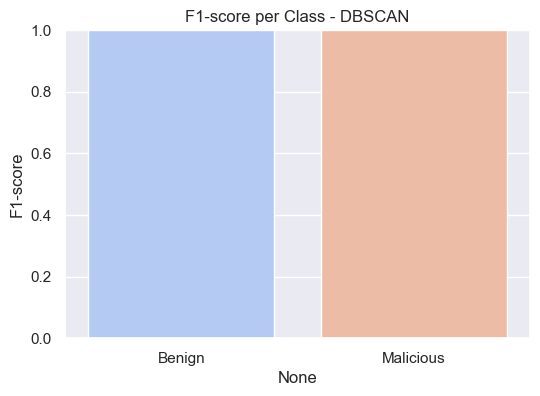

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Χαρακτηριστικά & ετικέτες
X = df_dbscan.drop(columns=['Label'])
y = df_dbscan['Label']

# Κανονικοποίηση
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# One-hot encoding για binary classification
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Μοντέλο
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)

evaluate_nn(model, X_test, y_test, dataset_name="DBSCAN")

Epoch 1/20


c:\Users\aggel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9674 - loss: 0.1474 - val_accuracy: 0.9854 - val_loss: 0.0416
Epoch 2/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9869 - loss: 0.0450 - val_accuracy: 0.9900 - val_loss: 0.0282
Epoch 3/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9895 - loss: 0.0318 - val_accuracy: 0.9910 - val_loss: 0.0209
Epoch 4/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9932 - loss: 0.0237 - val_accuracy: 0.9946 - val_loss: 0.0138
Epoch 5/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0175 - val_accuracy: 0.9973 - val_loss: 0.0095
Epoch 6/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9971 - val_loss: 0.0081
Epoch 7/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9970 - loss: 0.0107 - val_accuracy: 0.9978 - val_loss: 0.0064
Epoch 8/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.9978 - val_

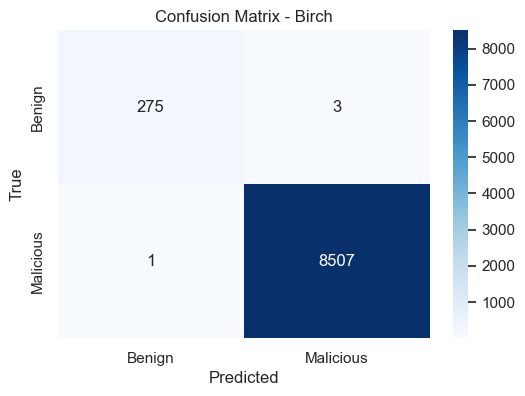

C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\4124499083.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_df.index, y=f1_df['F1-score'], palette="coolwarm")


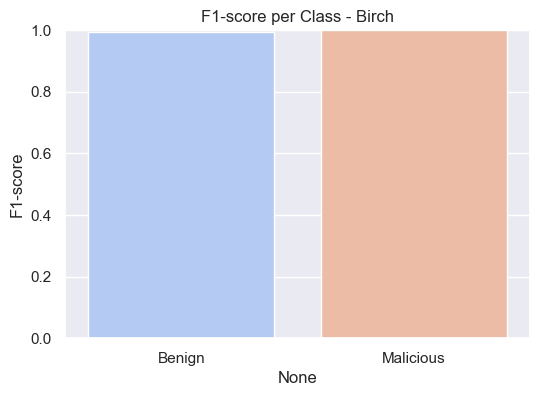

In [55]:
X = df_birch.drop(columns=['Label'])
y = df_birch['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)

evaluate_nn(model, X_test, y_test, dataset_name="Birch")

Epoch 1/20


c:\Users\aggel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9586 - loss: 0.1501 - val_accuracy: 0.9914 - val_loss: 0.0321
Epoch 2/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9930 - val_loss: 0.0200
Epoch 3/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9907 - loss: 0.0269 - val_accuracy: 0.9950 - val_loss: 0.0154
Epoch 4/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9916 - loss: 0.0245 - val_accuracy: 0.9967 - val_loss: 0.0113
Epoch 5/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accuracy: 0.9980 - val_loss: 0.0084
Epoch 6/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9942 - loss: 0.0168 - val_accuracy: 0.9983 - val_loss: 0.0087
Epoch 7/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9962 - loss: 0.0134 - val_accuracy: 0.9980 - val_loss: 0.0064
Epoch 8/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9974 - loss: 0.0101 - val_accuracy: 0.9983 - val_

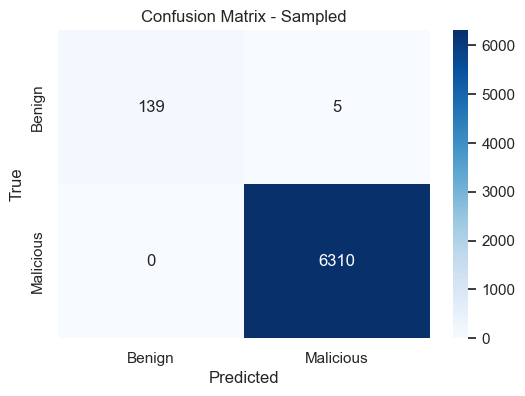

C:\Users\aggel\AppData\Local\Temp\ipykernel_42572\4124499083.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_df.index, y=f1_df['F1-score'], palette="coolwarm")


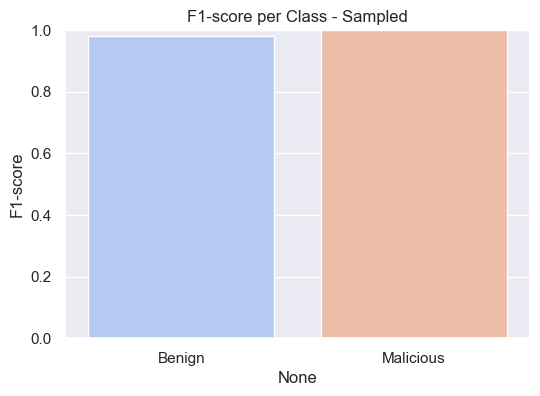

In [56]:
X = df_sampled.drop(columns=['Label'])
y = df_sampled['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)

evaluate_nn(model, X_test, y_test, dataset_name="Sampled")